In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cityseer.metrics import layers
from cityseer.tools import graphs, io


In [2]:
streets_gpd = gpd.read_file("data/madrid_streets/street_network.gpkg")
streets_gpd = streets_gpd.explode(reset_index=True)
G = io.nx_from_generic_geopandas(streets_gpd)
G_dual = graphs.nx_to_dual(G)
nodes_gdf, _edges_gdf, network_structure = io.network_structure_from_nx(G_dual)

100%|██████████| 47155/47155 [00:03<00:00, 14513.54it/s]
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
100%|██████████| 47129/47129 [00:00<00:00, 275013.08it/s]
INFO:cityseer.tools.graphs:Converting graph to dual.
INFO:cityseer.tools.graphs:Preparing dual nodes
100%|██████████| 47129/47129 [00:00<00:00, 135608.10it/s]
INFO:cityseer.tools.graphs:Preparing dual edges (splitting and welding geoms)
100%|██████████| 47129/47129 [00:19<00:00, 2371.40it/s]
INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.
100%|██████████| 47129/47129 [00:17<00:00, 2768.03it/s]


In [3]:
prems_gpd = gpd.read_file("data/madrid_premises/madrid_premises.gpkg")
prems_gpd.head()

,index,local_id,local_distr_id,local_distr_desc,local_neighb_id,local_neighb_desc,local_neighb_code,local_census_section_id,local_census_section_desc,section_id,section_desc,division_id,division_desc,epigraph_id,epigraph_desc,easting,northing,geometry
0,0,10003324,1,CENTRO,105,UNIVERSIDAD,5,1091,91,I,hospitality,56,food_bev,561001,RESTAURANTE,440181.6,4475586.5,POINT (440181.6 4475586.5)
1,1,10003330,1,CENTRO,105,UNIVERSIDAD,5,1115,115,R,art_rec_entert,90,creat_entert,900003,TEATRO Y ACTIVIDADES ESCENICAS REALIZADAS EN D...,440000.6,4474761.5,POINT (440000.6 4474761.5)
2,2,10003356,1,CENTRO,104,JUSTICIA,4,1074,74,I,hospitality,56,food_bev,561004,BAR RESTAURANTE,440618.6,4474692.5,POINT (440618.6 4474692.5)
3,3,10003364,1,CENTRO,104,JUSTICIA,4,1075,75,G,wholesale_retail_motor,47,retail,472401,COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...,440666.6,4474909.5,POINT (440666.6 4474909.5)
4,4,10003367,1,CENTRO,106,SOL,6,1119,119,G,wholesale_retail_motor,47,retail,477701,"COMERCIO AL POR MENOR DE JOYAS, RELOJERIA Y BI...",440378.6,4474380.5,POINT (440378.6 4474380.5)


In [4]:
prems_gpd.division_desc.unique()

array(['food_bev', 'creat_entert', 'retail', 'services', 'education',
       'accommod', 'Real Estate Activities',
       'Residential Care Activities',
       'Social Services Without Accommodation',
       'Graphic Arts and Reproduction of Recorded Media',
       'Sale and Repair of Motor Vehicles and Motorcycles',
       'Decontamination and Other Waste Management Services',
       'Gambling and Betting Activities', 'sports_rec', 'health',
       'Wholesale Trade and Middlemen, Except for Motor Vehicles and Motorcycles',
       'Telecommunications',
       'Financial Services, Except Insurance and Pension Funds',
       'Associative Activities', 'Veterinary Activities',
       'Auxiliary Services to Financial Services and Insurance',
       'Insurance, Reinsurance, and Pension Funds, Except Compulsory Social Security',
       'Rental Activities',
       'Office Administrative and Other Business Support Activities',
       'Technical Services of Architecture and Engineering; Technica

In [5]:
# compute pub accessibility
distances = [100, 200, 400, 800]
nodes_gdf, prems_gpd = layers.compute_mixed_uses(
    prems_gpd,
    landuse_column_label="division_desc",
    nodes_gdf=nodes_gdf,
    network_structure=network_structure,
    distances=distances,
)

INFO:cityseer.metrics.layers:Computing mixed-use measures.
INFO:cityseer.metrics.layers:Assigning data to network.
100%|██████████| 47129/47129 [00:24<00:00, 1939.47it/s]
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 100m, Beta: 0.04, Walking Time: 1.25 minutes.
INFO:cityseer.config:Distance: 200m, Beta: 0.02, Walking Time: 2.5 minutes.
INFO:cityseer.config:Distance: 400m, Beta: 0.01, Walking Time: 5.0 minutes.
INFO:cityseer.config:Distance: 800m, Beta: 0.005, Walking Time: 10.0 minutes.


In [6]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_hill_q0_100_nw', 'cc_hill_q0_100_wt',
       'cc_hill_q1_100_nw', 'cc_hill_q1_100_wt', 'cc_hill_q2_100_nw',
       'cc_hill_q2_100_wt', 'cc_hill_q0_200_nw', 'cc_hill_q0_200_wt',
       'cc_hill_q1_200_nw', 'cc_hill_q1_200_wt', 'cc_hill_q2_200_nw',
       'cc_hill_q2_200_wt', 'cc_hill_q0_400_nw', 'cc_hill_q0_400_wt',
       'cc_hill_q1_400_nw', 'cc_hill_q1_400_wt', 'cc_hill_q2_400_nw',
       'cc_hill_q2_400_wt', 'cc_hill_q0_800_nw', 'cc_hill_q0_800_wt',
       'cc_hill_q1_800_nw', 'cc_hill_q1_800_wt', 'cc_hill_q2_800_nw',
       'cc_hill_q2_800_wt'],
      dtype='object')

(np.float64(439000.0),
 np.float64(441500.0),
 np.float64(4473000.0),
 np.float64(4475500.0))

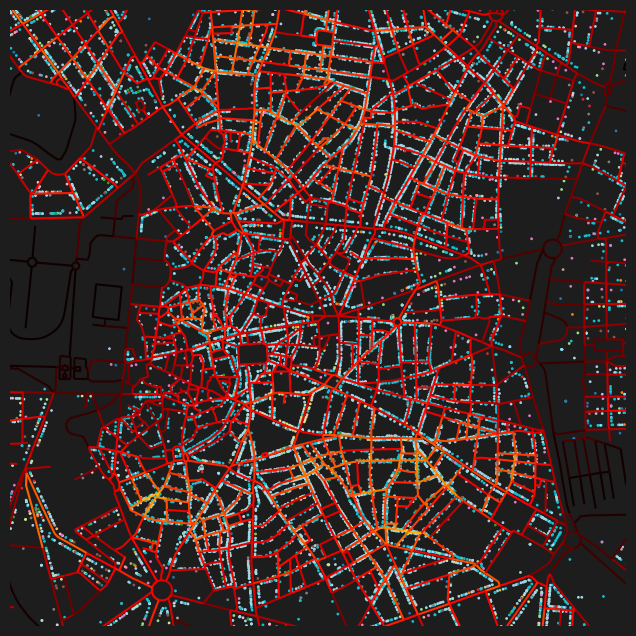

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_hill_q0_400_wt",
    cmap="hot",
    legend=False,
    ax=ax,
)
prems_gpd.plot(
    column="division_desc",
    cmap="tab20",
    markersize=1,
    edgecolor=None,
    legend=False,
    ax=ax,
)
ax.set_xlim(439000, 439000 + 2500)
ax.set_ylim(4473000, 4473000 + 2500)
ax.axis(False)


(np.float64(439000.0),
 np.float64(441500.0),
 np.float64(4473000.0),
 np.float64(4475500.0))

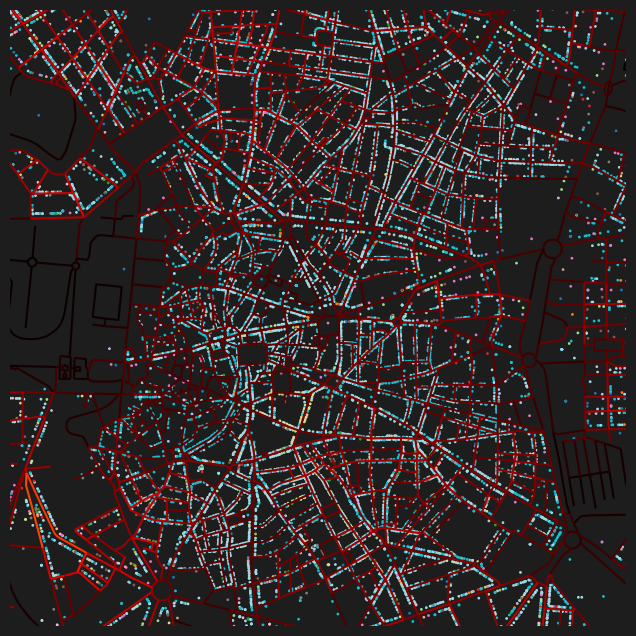

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_hill_q1_400_wt",
    cmap="hot",
    legend=False,
    ax=ax,
)
prems_gpd.plot(
    column="division_desc",
    cmap="tab20",
    markersize=1,
    edgecolor=None,
    legend=False,
    ax=ax,
)
ax.set_xlim(439000, 439000 + 2500)
ax.set_ylim(4473000, 4473000 + 2500)
ax.axis(False)


(np.float64(439000.0),
 np.float64(441500.0),
 np.float64(4473000.0),
 np.float64(4475500.0))

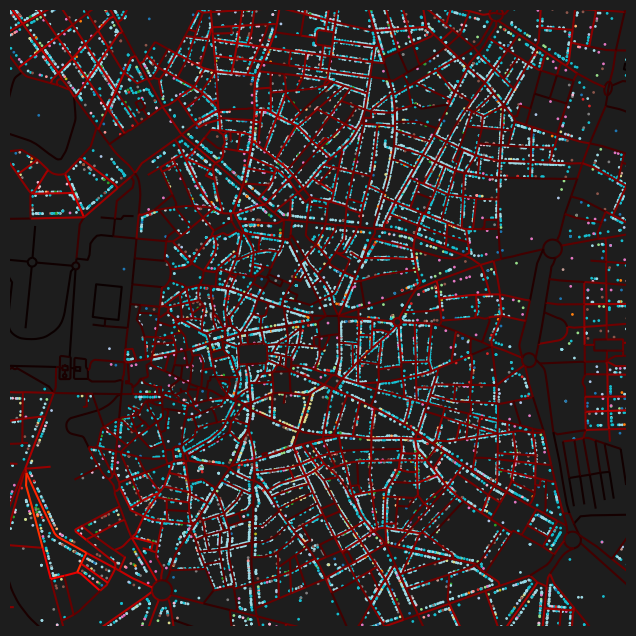

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="##1d1d1d")
nodes_gdf.plot(
    column="cc_hill_q2_400_wt",
    cmap="hot",
    legend=False,
    ax=ax,
)
prems_gpd.plot(
    column="division_desc",
    cmap="tab20",
    markersize=1,
    edgecolor=None,
    legend=False,
    ax=ax,
)
ax.set_xlim(439000, 439000 + 2500)
ax.set_ylim(4473000, 4473000 + 2500)
ax.axis(False)
